<a href="https://colab.research.google.com/github/nicolagentili/DTM_ML_Exam/blob/main/DTM_Exam_Clustering_simple_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd
import numpy as np
import math

In [191]:
train = pd.DataFrame()

def createDataset(number, xMean, xDev, yMean, yDev, classLabel):
  ds = pd.DataFrame()
  x = np.random.normal(xMean, xDev, number)
  y = np.random.normal(yMean, yDev, number)
  ds['x'] = x
  ds['y'] = y
  ds['label'] = ''
  ds['class'] = classLabel
  return ds

trainA = createDataset(500,5,0.4,5,0.4,'orange')
trainB = createDataset(500,1,0.4,1,0.4,'cyan')

train = pd.concat([trainA, trainB], ignore_index=True)

Assigned class is: cyan
KNNs are:
(4.279289106082363,3.917530004330934): orange
(4.173099202104347,4.21516830505294): orange
(1.8168603836007116,1.7515963863384445): cyan
(1.641237541035816,1.8777527845471935): cyan
(4.080012893487612,4.455972443103179): orange
(4.19691108500345,4.3905515318851265): orange
(1.499661008575719,1.9399665544432323): cyan
(4.427463092664164,4.170795371647959): orange
(1.3520727248693176,2.144739937845715): cyan
(1.741652229925117,1.619317982410383): cyan
(1.6607763216652942,1.6898206985684991): cyan
(1.7245668676057908,1.6047612922695822): cyan
(1.825791941161313,1.501880673428445): cyan
(4.363013307496021,4.392069254137931): orange
(1.4415801646131727,1.7397899338034795): cyan


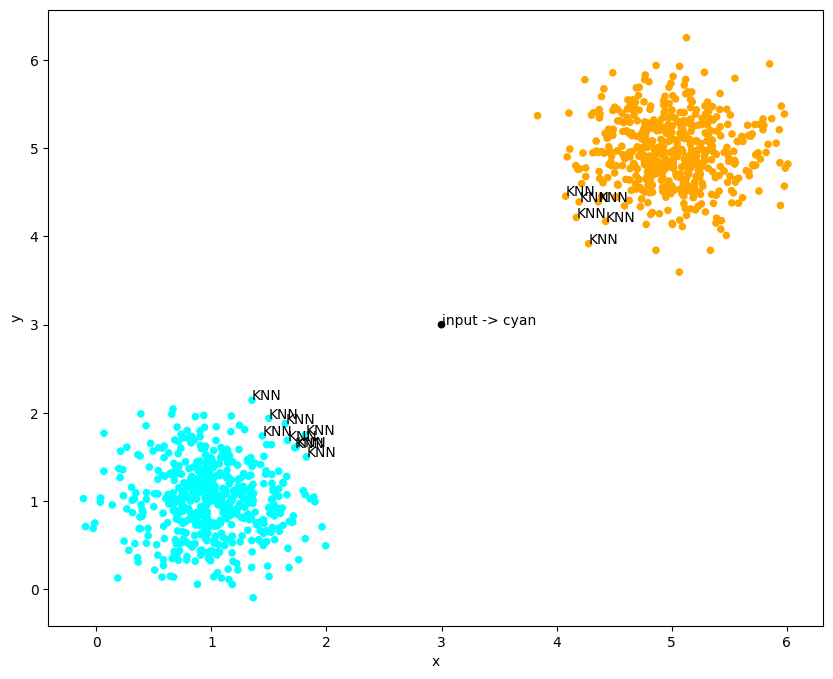

In [192]:
import matplotlib.pyplot as plt

input = pd.DataFrame()

input_x = 3
input_y = 3
k = 15

train['dist'] = pow( pow(train['x']-input_x,2) + pow(train['y']-input_y,2) , 0.5 )

train.sort_values(by=['dist'], inplace=True, ignore_index=True)

assignedClass = train[0:k]['class'].mode()

assignedClass = assignedClass[0]

print('Assigned class is: ' + assignedClass)

print("KNNs are:")

for i in range(k):
  print("(" + str(train.at[i,'x']) + "," + str(train.at[i,'y']) + "): " + str(train.at[i,'class']))
  train.at[i, 'label'] = 'KNN'



dfInput = pd.DataFrame({"x":[input_x],"y":[input_y], "class":"black", "dist":0, "label":"input -> " + assignedClass})

trainPlot = pd.concat([train, dfInput], ignore_index=True)

ax = trainPlot.plot.scatter(x='x', y='y', c='class', legend=True, figsize=(10,8))

#label each point in scatter plot
for idx, row in trainPlot.iterrows():
    ax.annotate(row['label'], (row['x'], row['y']))
